# Map statistics of objects in one channel in relation to overlapping objects in another channel

In [1]:
from skimage import measure, io
import numpy as np
import pandas as pd
import napari
from napari.utils import nbscreenshot
# from colormaps import glasbey_cmap
from napari_skimage_regionprops import measure_labels, measure_labels_with_intensity, measure_labels_in_labels, measure_labels_in_labels_with_intensity, link_two_label_images, make_summary_table

In [2]:
image_channel1 = io.imread('../data/actin.tif')
image_channel2 = io.imread('../data/dna.tif')
cell_labels = io.imread('../data/cell_labels.tif')
dna_labels = io.imread('../data/dna_labels.tif')

In [3]:
viewer = napari.Viewer()

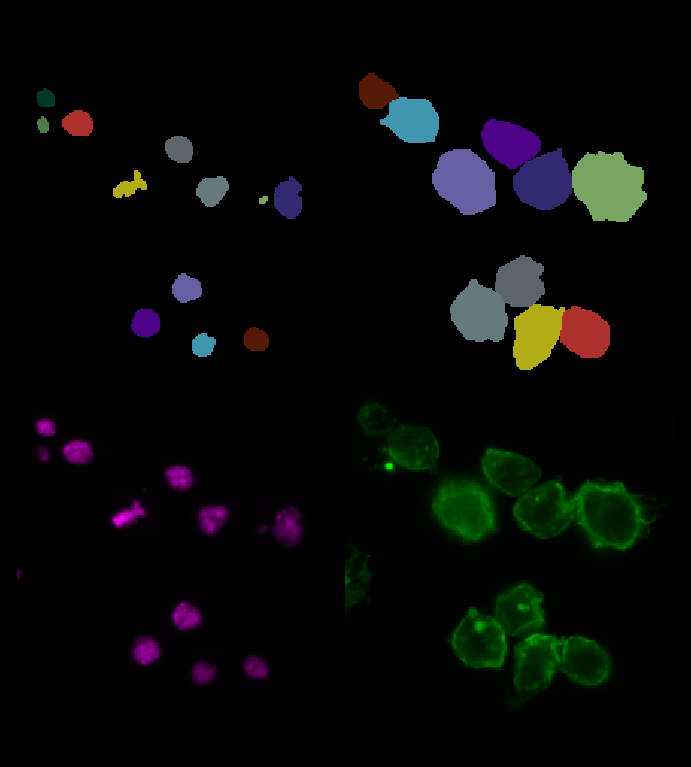

In [4]:
viewer.add_image(image_channel1, name = 'dna', colormap='green')
viewer.add_image(image_channel2, name = 'dna', colormap='magenta')
viewer.add_labels(cell_labels)
viewer.add_labels(dna_labels)
viewer.grid.enabled = True
nbscreenshot(viewer, canvas_only=True)

## Measure cell size and shape features

In [6]:
measurements = measure_labels(reference_labels=cell_labels)
measurements

,label,area,bbox_area,convex_area,equivalent_diameter
0,1,442,648,461,23.722813
1,2,910,1240,972,34.038919
2,3,1407,1892,1452,42.325501
3,4,911,1320,941,34.057616
4,5,1185,1680,1231,38.843131
5,6,1803,2400,1919,47.912951
6,7,1167,1638,1226,38.546991
7,8,898,1190,947,33.813741
8,9,1108,1540,1170,37.559944
9,10,904,1155,934,33.926517


## Measure cell intensity features

In [7]:
measurements_with_intensity = measure_labels_with_intensity(reference_labels=cell_labels, intensity_image=image_channel1)
measurements_with_intensity

,label,area,bbox_area,convex_area,equivalent_diameter,max_intensity,mean_intensity,min_intensity,standard_deviation_intensity
0,1,442,648,461,23.722813,64.0,23.988688,9.0,10.084142
1,2,910,1240,972,34.038919,96.0,42.542857,16.0,14.954136
2,3,1407,1892,1452,42.325501,128.0,72.480455,24.0,16.704404
3,4,911,1320,941,34.057616,105.0,45.803513,14.0,16.341103
4,5,1185,1680,1231,38.843131,135.0,51.278481,20.0,19.006819
5,6,1803,2400,1919,47.912951,136.0,56.301165,16.0,24.383326
6,7,1167,1638,1226,38.546991,173.0,57.770351,15.0,25.595871
7,8,898,1190,947,33.813741,158.0,58.677060,31.0,20.385384
8,9,1108,1540,1170,37.559944,170.0,58.275271,15.0,29.068217
9,10,904,1155,934,33.926517,122.0,46.915929,12.0,18.021546


## Link each cell to objects in another channel

In [8]:
labels_relationship = link_two_label_images(reference_labels=cell_labels, labels_to_measure=dna_labels)
labels_relationship

,label_reference,label
0,0,12
1,1,11
2,2,10
3,3,9
4,4,8
5,5,7
6,6,5
7,6,6
8,7,4
9,8,3


## Link each cell to objects in another channel along with their size and shape features

In [9]:
measurements_linked = measure_labels_in_labels(reference_labels=cell_labels,
                                                labels_to_measure=dna_labels,
                                                suffixes=['_cells', '_dna'])
measurements_linked

z:\programming\github\napari-skimage-regionprops\napari_skimage_regionprops\_regionprops.py:692: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  output_table = pd.merge(output_table,


,label_cells,area_cells,bbox_area_cells,convex_area_cells,equivalent_diameter_cells,label_dna,area_dna,bbox_area_dna,convex_area_dna,equivalent_diameter_dna
0,1,442.0,648.0,461.0,23.722813,11,130,156,135,12.865502
1,2,910.0,1240.0,972.0,34.038919,10,283,357,293,18.982276
2,3,1407.0,1892.0,1452.0,42.325501,9,210,437,271,16.351768
3,4,911.0,1320.0,941.0,34.057616,8,275,342,284,18.712052
4,5,1185.0,1680.0,1231.0,38.843131,7,329,462,345,20.466944
5,6,1803.0,2400.0,1919.0,47.912951,5,413,551,437,22.931374
6,6,1803.0,2400.0,1919.0,47.912951,6,28,36,29,5.970821
7,7,1167.0,1638.0,1226.0,38.546991,4,299,380,310,19.511500
8,8,898.0,1190.0,947.0,33.813741,3,294,400,310,19.347672
9,9,1108.0,1540.0,1170.0,37.559944,2,194,256,206,15.716503


## Get individual cell summary statistics for each feature

In [12]:
measurements_linked_summary = make_summary_table(measurements_linked,
                                                suffixes=['_cells', '_dna'],
                                                statistics_list=['count'])
measurements_linked_summary

,label_cells,counts_dna
0,0,1
1,1,1
2,2,1
3,3,1
4,4,1
5,5,1
6,6,2
7,7,1
8,8,1
9,9,1


## Link each cell to objects in another channel along with their intensity features

In [13]:
measurements_with_intensity_linked = measure_labels_in_labels_with_intensity(reference_labels=cell_labels,
                                                                intensity_image_of_reference=image_channel1,
                                                                labels_to_measure=dna_labels,
                                                                intensity_image_of_labels_to_measure=image_channel2,
                                                                suffixes=['_cells', '_dna'])
measurements_with_intensity_linked

z:\programming\github\napari-skimage-regionprops\napari_skimage_regionprops\_regionprops.py:692: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  output_table = pd.merge(output_table,


,label_cells,area_cells,bbox_area_cells,convex_area_cells,equivalent_diameter_cells,max_intensity_cells,mean_intensity_cells,min_intensity_cells,standard_deviation_intensity_cells,label_dna,area_dna,bbox_area_dna,convex_area_dna,equivalent_diameter_dna,max_intensity_dna,mean_intensity_dna,min_intensity_dna,standard_deviation_intensity_dna
0,1,442.0,648.0,461.0,23.722813,64.0,23.988688,9.0,10.084142,11,130,156,135,12.865502,183.0,104.346154,19.0,40.762674
1,2,910.0,1240.0,972.0,34.038919,96.0,42.542857,16.0,14.954136,10,283,357,293,18.982276,182.0,99.568905,28.0,34.877849
2,3,1407.0,1892.0,1452.0,42.325501,128.0,72.480455,24.0,16.704404,9,210,437,271,16.351768,247.0,127.585714,24.0,55.615558
3,4,911.0,1320.0,941.0,34.057616,105.0,45.803513,14.0,16.341103,8,275,342,284,18.712052,173.0,96.658182,23.0,37.846574
4,5,1185.0,1680.0,1231.0,38.843131,135.0,51.278481,20.0,19.006819,7,329,462,345,20.466944,161.0,79.708207,10.0,32.925170
5,6,1803.0,2400.0,1919.0,47.912951,136.0,56.301165,16.0,24.383326,5,413,551,437,22.931374,132.0,58.987893,14.0,24.761279
6,6,1803.0,2400.0,1919.0,47.912951,136.0,56.301165,16.0,24.383326,6,28,36,29,5.970821,56.0,35.607143,13.0,11.564537
7,7,1167.0,1638.0,1226.0,38.546991,173.0,57.770351,15.0,25.595871,4,299,380,310,19.511500,159.0,91.602007,21.0,35.582475
8,8,898.0,1190.0,947.0,33.813741,158.0,58.677060,31.0,20.385384,3,294,400,310,19.347672,171.0,94.469388,24.0,31.542932
9,9,1108.0,1540.0,1170.0,37.559944,170.0,58.275271,15.0,29.068217,2,194,256,206,15.716503,102.0,61.324742,20.0,20.118020
